ВСЕГО В КОЛЛАБЕ ДОЛЖНО БЫТЬ

1)  задача по нахождению матрицы состоящей из 45 единиц
2) поиск экстремума функции растрыгина и розенброка 
3) поиск экстремума функции Химмельблау и Эггхолдера; код на ютубе, девятая лаба
4) символьная регрессия и придумать свою функцию
5) аппроксимация функции в 3д
6) придумаь свою функцию в 3д и ее аппроксимировать 
7) робот и решетки 
8) работа 6 из ютуба, поиск путей по графу
9) метан



## ЛР №1

In [2]:
import random
import numpy as np
from deap import base, creator, tools, algorithms

# 1. Определение целевой функции (eval_func)
def eval_func(individual):
    target_sum = 45
    return len(individual) - abs(sum(individual) - target_sum),

# 2. Создание инструментов (create_toolbox)
def create_toolbox(num_bits):
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()

    toolbox.register("attr_bool", random.randint, 0, 1)
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, num_bits)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    toolbox.register("evaluate", eval_func)
    toolbox.register("mate", tools.cxOnePoint)
    toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
    toolbox.register("select", tools.selTournament, tournsize=3)

    return toolbox

# 3. Инициализация популяции
num_bits = 100
toolbox = create_toolbox(num_bits)
population = toolbox.population(n=250)
probab_crossing, probab_mutating = 0.5, 0.2
num_generations = 60

# 4. Эволюция
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

hof = tools.HallOfFame(1)

pop, logbook = algorithms.eaSimple(population, toolbox, cxpb=probab_crossing, mutpb=probab_mutating,
                                   ngen=num_generations, stats=stats, halloffame=hof, verbose=True)

# 5. Вывод результатов
min_fit = min(ind.fitness.values[0] for ind in pop)
max_fit = max(ind.fitness.values[0] for ind in pop)
mean_fit = stats.compile(pop)['avg']
std_dev = stats.compile(pop)['std']

print('Min =', min_fit, ', Max =', max_fit)
print('Average =', round(mean_fit, 2), ', Standard deviation =', round(std_dev, 2))

print("\n==== End of evolution")

best_ind = hof[0]
print('\nBest individual:\n', best_ind)
print('\nNumber of ones:', sum(best_ind))

c:\Users\Милана\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Милана\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg  	std   	min	max
0  	250   	94.08	4.2116	80 	100
1  	138   	96.924	2.44913	88 	100
2  	152   	98.236	1.60134	92 	100
3  	150   	98.54 	1.43958	91 	100
4  	162   	98.66 	1.42562	94 	100
5  	133   	98.664	1.60222	90 	100
6  	151   	98.792	1.42994	92 	100
7  	143   	98.776	1.54332	94 	100
8  	142   	98.764	1.60882	93 	100
9  	151   	98.864	1.41898	94 	100
10 	152   	98.676	1.75357	89 	100
11 	136   	98.84 	1.50678	93 	100
12 	150   	98.656	1.71862	92 	100
13 	144   	98.608	1.63656	92 	100
14 	165   	98.768	1.64018	92 	100
15 	166   	98.696	1.73309	89 	100
16 	149   	98.852	1.46359	93 	100
17 	159   	98.852	1.40787	95 	100
18 	154   	98.88 	1.61295	91 	100
19 	162   	98.992	1.28372	94 	100
20 	134   	99.072	1.45699	92 	100
21 	138   	98.908	1.63081	92 	100
22 	136   	99.108	1.36541	91 	100
23 	143   	99.06 	1.24274	94 	100
24 	156   	99.072	1.36045	93 	100
25 	146   	99.148	1.21906	95 	100
26 	129   	99.324	0.997509	96 	100
27 	142   	99.276	1.20326 	94 	100
28 	146   	99.14

## ЛР №2

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=806946, Sat May 25 14:42:28 2024)
(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 20 (seed=803761, Sat May 25 14:42:28 2024)
gen	evals	std        	min        	avg        	max        
0  	12   	1.51365e+06	1.00051e+06	2.6251e+06 	6.28098e+06
1  	12   	2.42641e+06	927235     	3.45093e+06	8.75122e+06
2  	12   	1.7399e+06 	838387     	3.03213e+06	6.29085e+06
3  	12   	944949     	476446     	1.50129e+06	2.92872e+06
4  	12   	874451     	819752     	2.04369e+06	3.50949e+06
5  	12   	1.26221e+06	726985     	2.06462e+06	5.53706e+06
6  	12   	718886     	316231     	1.55158e+06	2.97292e+06
7  	12   	1.59921e+06	407151     	1.78036e+06	5.88868e+06
8  	12   	671483     	569174     	1.40002e+06	2.74924e+06
9  	12   	661810     	125713     	1.02002e+06	2.41664e+06
10 	12   	170792     	184514     	437799     	845058     
11 	12   	300569     	148320     	454666     	1.09745e+06
12 	12   	163890     	126535     	340040     	713372     
13 	

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	evals	std    	min    	avg    	max    
0  	12   	178.749	427.736	773.946	1083.68
1  	12   	180.326	503.204	709.938	1212.41
2  	12   	125.619	444.162	655.387	870.551
3  	12   	146.327	366.314	599.68 	875.882
4  	12   	165.21 	316.883	584.267	901.857
5  	12   	103.287	394.894	524.619	699.816
6  	12   	81.7414	378.389	497.22 	624.009
7  	12   	51.3503	354.499	436.347	550.891
8  	12   	30.96  	376.217	448.996	489.437
9  	12   	68.2413	313.472	423.167	533.24 
10 	12   	55.1054	322.275	431.996	507.866
11 	12   	83.0291	251.156	389.987	503.838
12 	12   	71.7329	244.856	351.814	455.294
13 	12   	49.8711	239.703	319.537	406.33 
14 	12   	46.1774	224.47 	312.986	388.351
15 	12   	51.2848	231.28 	328.399	397.269
16 	12   	33.1403	215.672	289.171	330.366
17 	12   	35.334 	193.397	263.412	326.329
18 	12   	45.8721	221.602	293.232	396.254
19 	12   	47.8141	205.595	275.186	384.521
20 	12   	33.4713	214.743	264.409	320.775
21 	12   	45.0935	181.899	267.026	338.392
22 	12   	50.1499	165.382	276.866	

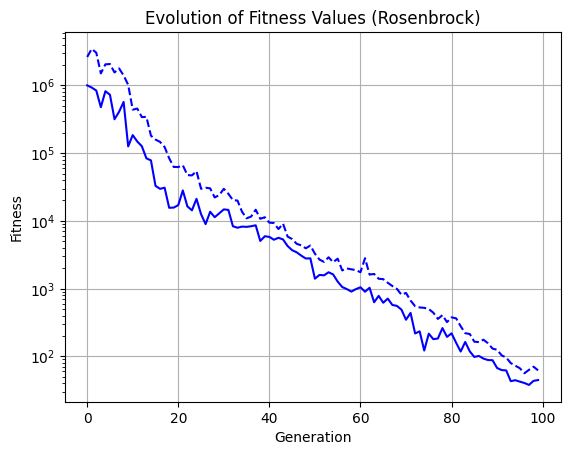

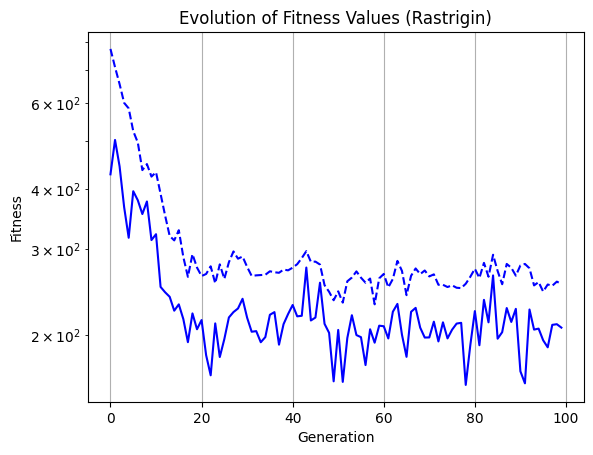

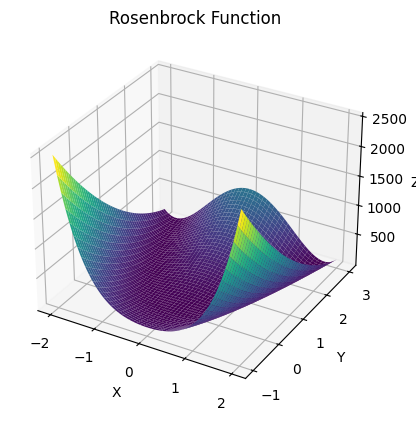

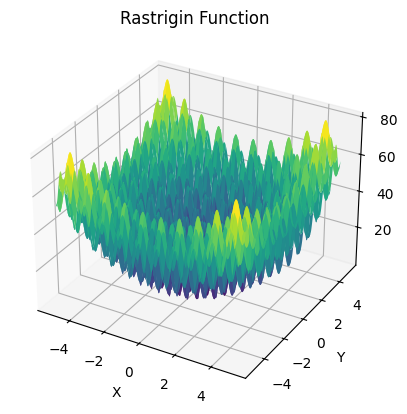

In [9]:
import numpy as np
import cma
from deap import base, creator, tools
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Функция Розенброка
def rosenbrock(individual):
    return sum(100.0 * (individual[i + 1] - individual[i] ** 2.0) ** 2.0 + (1 - individual[i]) ** 2.0 for i in range(len(individual) - 1))

# Функция Растрыгина
def rastrigin(individual):
    A = 10
    return A * len(individual) + sum((x ** 2 - A * np.cos(2 * np.pi * x)) for x in individual)

# 1. Определение цели и настройка инструментов
def create_toolbox(strategy, func):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", func)
    np.random.seed(7)
    
    def generate():
        solutions = strategy.ask()
        return [creator.Individual(list(sol)) for sol in solutions]
    
    def update(population):
        solutions = [ind for ind in population]
        strategy.tell(solutions, [ind.fitness.values[0] for ind in population])
    
    toolbox.register("generate", generate)
    toolbox.register("update", update)

    return toolbox

# 2. Создание стратегии CMA-ES
num_individuals = 20
es_rosenbrock = cma.CMAEvolutionStrategy(num_individuals * [0], 5.0)
es_rastrigin = cma.CMAEvolutionStrategy(num_individuals * [0], 5.0)

toolbox_rosenbrock = create_toolbox(es_rosenbrock, rosenbrock)
toolbox_rastrigin = create_toolbox(es_rastrigin, rastrigin)

# 3. Регистрация статистик и журнала
stats = tools.Statistics(lambda x: x.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

logbook_rosenbrock = tools.Logbook()
logbook_rosenbrock.header = "gen", "evals", "std", "min", "avg", "max"

logbook_rastrigin = tools.Logbook()
logbook_rastrigin.header = "gen", "evals", "std", "min", "avg", "max"

# 4. Эволюция
num_generations = 100
hall_of_fame_rosenbrock = tools.HallOfFame(1)
hall_of_fame_rastrigin = tools.HallOfFame(1)

def run_evolution(toolbox, logbook, hall_of_fame):
    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = list(map(toolbox.evaluate, population))
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = (fit,)

        # Update the strategy with the evaluated individuals
        toolbox.update(population)

        # Update the hall of fame and the statistics with the currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)

    # Print the logbook
    print(logbook)

# Запуск эволюции для функции Розенброка
run_evolution(toolbox_rosenbrock, logbook_rosenbrock, hall_of_fame_rosenbrock)

# Запуск эволюции для функции Растрыгина
run_evolution(toolbox_rastrigin, logbook_rastrigin, hall_of_fame_rastrigin)

# 5. Визуализация
def plot_evolution(logbook, title):
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(logbook.select("gen"), avg, "--b")
    plt.semilogy(logbook.select("gen"), min_, "-b")
    plt.grid(True)
    plt.title(title)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

plot_evolution(logbook_rosenbrock, "Evolution of Fitness Values (Rosenbrock)")
plot_evolution(logbook_rastrigin, "Evolution of Fitness Values (Rastrigin)")

# 6. Визуализация функций Розенброка и Растрыгина в 3D
def plot_rosenbrock():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-2, 2, 400)
    Y = np.linspace(-1, 3, 400)
    X, Y = np.meshgrid(X, Y)
    Z = 100.0 * (Y - X**2)**2 + (1 - X)**2
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Rosenbrock Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

def plot_rastrigin():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    X = np.linspace(-5.12, 5.12, 400)
    Y = np.linspace(-5.12, 5.12, 400)
    X, Y = np.meshgrid(X, Y)
    Z = 10 * 2 + (X**2 - 10 * np.cos(2 * np.pi * X)) + (Y**2 - 10 * np.cos(2 * np.pi * Y))
    ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')
    ax.set_title('Rastrigin Function')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.show()

plot_rosenbrock()
plot_rastrigin()


gen	evals	std        	min   	avg       	max        
0  	200  	4.28523e+07	768969	3.7057e+07	3.28157e+08
1  	200  	3.17756e+07	1.10483e+06	3.54977e+07	2.09927e+08
2  	200  	2.22351e+07	305200     	2.12877e+07	1.24071e+08
3  	200  	2.19677e+07	105864     	1.67012e+07	1.91392e+08
4  	200  	6.65194e+06	123068     	6.47885e+06	4.83766e+07
5  	200  	3.45629e+06	65444.7    	3.06514e+06	2.66926e+07
6  	200  	1.54374e+06	67928.2    	1.54961e+06	1.08843e+07
7  	200  	778266     	24626.6    	778155     	7.50812e+06
8  	200  	435697     	10005.4    	390893     	4.30603e+06
9  	200  	177954     	14706.1    	189944     	1.35272e+06
10 	200  	108290     	10280.2    	114253     	702887     
11 	200  	158691     	4414.81    	103709     	1.82477e+06
12 	200  	107874     	3299.57    	72349.9    	986593     
13 	200  	48352.7    	1006.42    	38132.6    	387827     
14 	200  	32852.6    	1555.6     	30760.3    	232272     
15 	200  	23050.3    	599.569    	19421      	237268     
16 	200  	12865.2    	547.

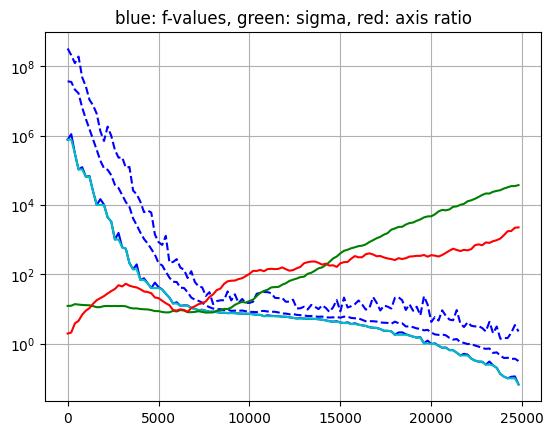

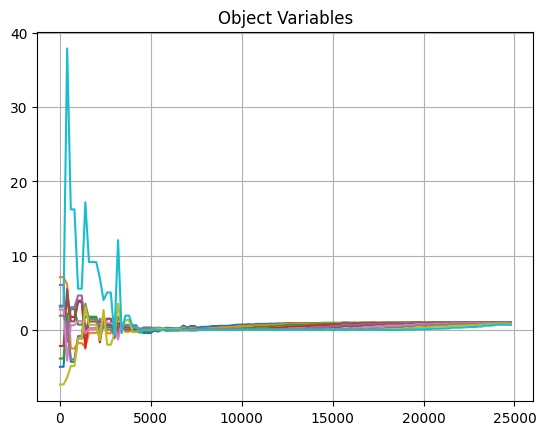

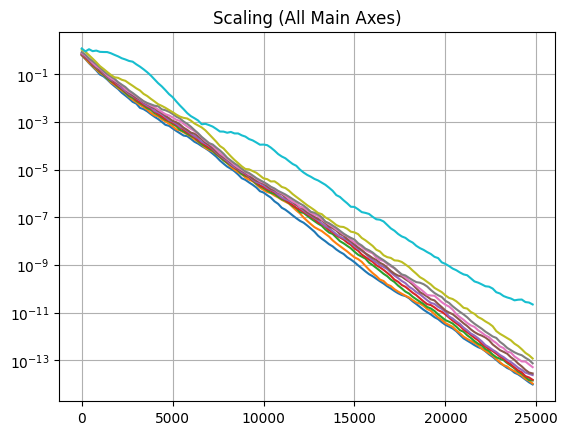

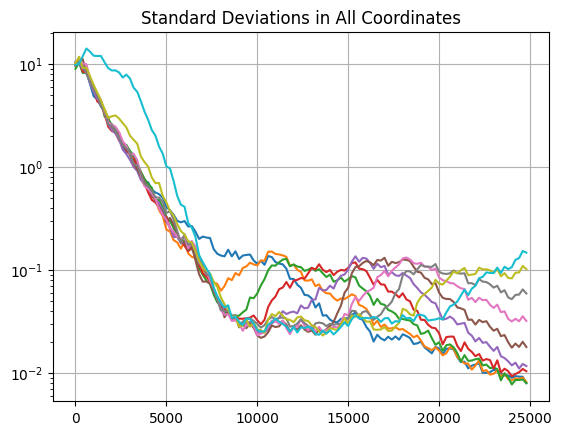

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from deap import algorithms, base, benchmarks, \
        cma, creator, tools

# Function to create a toolbox
def create_toolbox(strategy):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()
    toolbox.register("evaluate", benchmarks.rosenbrock)

    # Seeed the random number generator
    np.random.seed(7)

    toolbox.register("generate", strategy.generate, creator.Individual)
    toolbox.register("update", strategy.update)

    return toolbox

if __name__ == "__main__":
    # Problem size
    num_individuals = 10
    num_generations = 125

    # Create a strategy using CMA-ES algorithm
    strategy = cma.Strategy(centroid=[5.0]*num_individuals, sigma=10.0, 
            lambda_=20*num_individuals)

    # Create toolbox based on the above strategy
    toolbox = create_toolbox(strategy)

    # Create hall of fame object
    hall_of_fame = tools.HallOfFame(1)

    # Register the relevant stats
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)

    logbook = tools.Logbook()
    logbook.header = "gen", "evals", "std", "min", "avg", "max"
    
    # Objects that will compile the data
    sigma = np.ndarray((num_generations, 1))
    axis_ratio = np.ndarray((num_generations, 1))
    diagD = np.ndarray((num_generations, num_individuals))
    fbest = np.ndarray((num_generations,1))
    best = np.ndarray((num_generations, num_individuals))
    std = np.ndarray((num_generations, num_individuals))

    for gen in range(num_generations):
        # Generate a new population
        population = toolbox.generate()

        # Evaluate the individuals
        fitnesses = toolbox.map(toolbox.evaluate, population)
        for ind, fit in zip(population, fitnesses):
            ind.fitness.values = fit
        
        # Update the strategy with the evaluated individuals
        toolbox.update(population)
        
        # Update the hall of fame and the statistics with the
        # currently evaluated population
        hall_of_fame.update(population)
        record = stats.compile(population)
        logbook.record(evals=len(population), gen=gen, **record)
        
        print(logbook.stream)
        
        # Save more data along the evolution 
        sigma[gen] = strategy.sigma
        axis_ratio[gen] = max(strategy.diagD)**2/min(strategy.diagD)**2
        diagD[gen, :num_individuals] = strategy.diagD**2
        fbest[gen] = hall_of_fame[0].fitness.values
        best[gen, :num_individuals] = hall_of_fame[0]
        std[gen, :num_individuals] = np.std(population, axis=0)

    # The x-axis will be the number of evaluations
    x = list(range(0, strategy.lambda_ * num_generations, strategy.lambda_))
    avg, max_, min_ = logbook.select("avg", "max", "min")
    plt.figure()
    plt.semilogy(x, avg, "--b")
    plt.semilogy(x, max_, "--b")
    plt.semilogy(x, min_, "-b")
    plt.semilogy(x, fbest, "-c")
    plt.semilogy(x, sigma, "-g")
    plt.semilogy(x, axis_ratio, "-r")
    plt.grid(True)
    plt.title("blue: f-values, green: sigma, red: axis ratio")

    plt.figure()
    plt.plot(x, best)
    plt.grid(True)
    plt.title("Object Variables")

    plt.figure()
    plt.semilogy(x, diagD)
    plt.grid(True)
    plt.title("Scaling (All Main Axes)")

    plt.figure()
    plt.semilogy(x, std)
    plt.grid(True)
    plt.title("Standard Deviations in All Coordinates")
    
    plt.show()



## ЛР №3

c:\Users\Милана\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\Милана\AppData\Local\Programs\Python\Python312\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min     	avg    
0  	1000  	0.077887	135.139
1  	900   	0.077887	62.2171
2  	901   	0.069348	32.7963
3  	890   	0.032433	19.7964
4  	904   	0.029025	15.7549
5  	900   	0.00800743	14.014 
6  	909   	0.00493489	14.2818
7  	885   	0.00493489	12.853 
8  	900   	0.00493489	11.4896
9  	886   	0.00493489	12.2397
10 	906   	0.000616218	12.7301
[3.004098612690486, 1.9952439348522966]


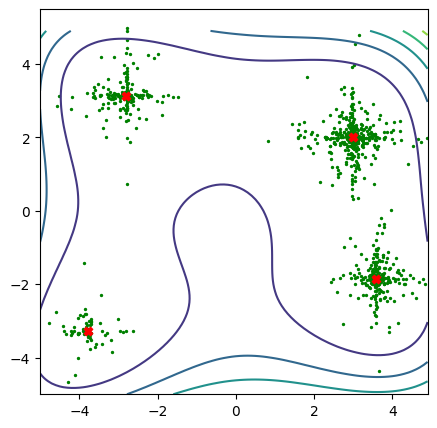

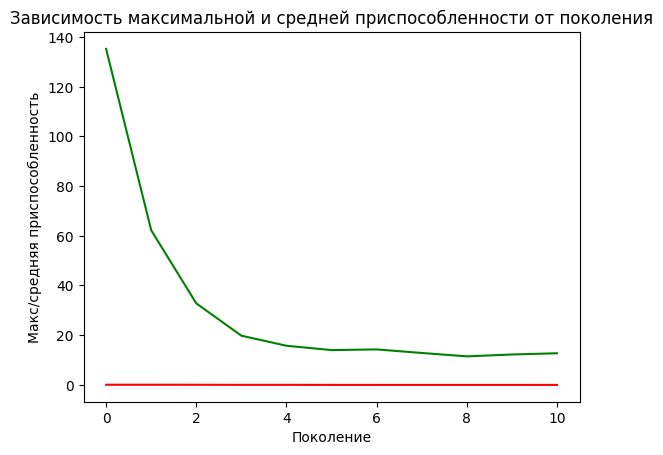

In [2]:
from deap import tools
from deap.algorithms import varAnd


def eaSimpleElitism(population, toolbox, cxpb, mutpb, ngen, stats=None,
             halloffame=None, verbose=__debug__, callback=None):
    """Перелеланный алгоритм eaSimple с элементом элитизма
    """

    logbook = tools.Logbook()
    logbook.header = ['gen', 'nevals'] + (stats.fields if stats else [])

    # Evaluate the individuals with an invalid fitness
    invalid_ind = [ind for ind in population if not ind.fitness.valid]
    fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    if halloffame is not None:
        halloffame.update(population)

    hof_size = len(halloffame.items) if halloffame.items else 0

    record = stats.compile(population) if stats else {}
    logbook.record(gen=0, nevals=len(invalid_ind), **record)
    if verbose:
        print(logbook.stream)

    # Begin the generational process
    for gen in range(1, ngen + 1):
        # Select the next generation individuals
        offspring = toolbox.select(population, len(population) - hof_size)

        # Vary the pool of individuals
        offspring = varAnd(offspring, toolbox, cxpb, mutpb)

        # Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = toolbox.map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        offspring.extend(halloffame.items)

        # Update the hall of fame with the generated individuals
        if halloffame is not None:
            halloffame.update(offspring)

        # Replace the current population by the offspring
        population[:] = offspring

        # Append the current generation statistics to the logbook
        record = stats.compile(population) if stats else {}
        logbook.record(gen=gen, nevals=len(invalid_ind), **record)
        if verbose:
            print(logbook.stream)

        if callback:
            callback[0](*callback[1])

    return population, logbook

from deap import base, algorithms
from deap import creator
from deap import tools



import random
import matplotlib.pyplot as plt
import numpy as np

LOW, UP = -5, 5
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 1000   # количество индивидуумов в популяции
P_CROSSOVER = 0.02       # вероятность скрещивания
P_MUTATION = 0.9        # вероятность мутации индивидуума
MAX_GENERATIONS = 10    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def himmelblau(individual):
    x, y = individual
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,

toolbox.register("evaluate", himmelblau)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.2)


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xgrid, ygrid = np.meshgrid(x, y)

f_himmelbalu = (xgrid**2 + ygrid - 11)**2 + (xgrid + ygrid**2 - 7)**2

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

#algelitism.eaSimpleElitism
#algorithms.eaSimple
population, logbook = eaSimpleElitism(population, toolbox,
                                        cxpb=P_CROSSOVER,
                                        mutpb=P_MUTATION,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        callback=(show, (ax, xgrid, ygrid, f_himmelbalu)),
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()



Minimum of Himmelblau's function: [3. 2.] with value 1.5777218104420236e-29
Minimum of Eggholder's function: [482.35336681 432.87905358] with value -956.9182316240206


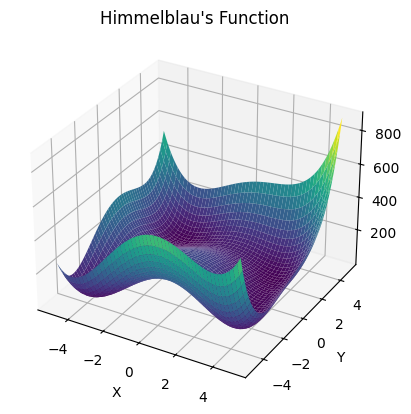

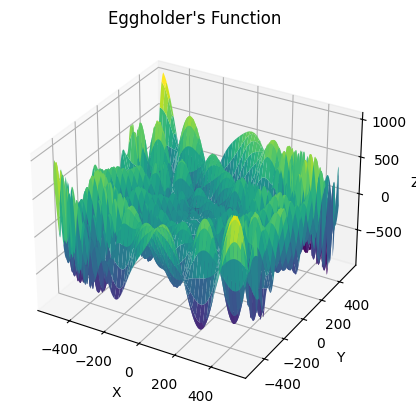

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

# Определение функции Химмельблау
def himmelblau(x):
    return (x[0]**2 + x[1] - 11)**2 + (x[0] + x[1]**2 - 7)**2

# Определение функции Эггхолдера
def eggholder(x):
    return -(x[1] + 47) * np.sin(np.sqrt(abs(x[0]/2 + (x[1] + 47)))) - x[0] * np.sin(np.sqrt(abs(x[0] - (x[1] + 47))))

# Поиск экстремума с помощью дифференциальной эволюции
def find_minima(func, bounds):
    result = differential_evolution(func, bounds)
    return result.x, result.fun

# Построение 3D-графика функции
def plot_function(func, bounds, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    X = np.linspace(bounds[0][0], bounds[0][1], 400)
    Y = np.linspace(bounds[1][0], bounds[1][1], 400)
    X, Y = np.meshgrid(X, Y)
    Z = np.array([func([x, y]) for x, y in zip(X.flatten(), Y.flatten())])
    Z = Z.reshape(X.shape)

    ax.plot_surface(X, Y, Z, cmap='viridis')
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')

    plt.show()

# Параметры для функции Химмельблау
bounds_himmelblau = [(-5, 5), (-5, 5)]
minima_himmelblau, value_himmelblau = find_minima(himmelblau, bounds_himmelblau)

# Параметры для функции Эггхолдера
bounds_eggholder = [(-512, 512), (-512, 512)]
minima_eggholder, value_eggholder = find_minima(eggholder, bounds_eggholder)

print(f"Minimum of Himmelblau's function: {minima_himmelblau} with value {value_himmelblau}")
print(f"Minimum of Eggholder's function: {minima_eggholder} with value {value_eggholder}")

# Построение графиков
plot_function(himmelblau, bounds_himmelblau, "Himmelblau's Function")
plot_function(eggholder, bounds_eggholder, "Eggholder's Function")


## ЛР №4

In [12]:
import operator
import math
import random

import numpy as np
from deap import algorithms, base, creator, tools, gp

# Define new functions
def division_operator(numerator, denominator):
    if denominator == 0:
        return 1

    return numerator / denominator 

# Define the evaluation function
def eval_func(individual, points):
    # Transform the tree expression in a callable function
    func = toolbox.compile(expr=individual)

    # Evaluate the mean squared error
    mse = ((func(x) - (5 * x**4 + 6 * x**3 - 2 * x + 2))**2 for x in points)

    return math.fsum(mse) / len(points),

# Function to create the toolbox
def create_toolbox():
    pset = gp.PrimitiveSet("MAIN", 1)
    pset.addPrimitive(operator.add, 2)
    pset.addPrimitive(operator.sub, 2)
    pset.addPrimitive(operator.mul, 2)
    pset.addPrimitive(division_operator, 2)
    pset.addPrimitive(operator.neg, 1)
    pset.addPrimitive(math.cos, 1)
    pset.addPrimitive(math.sin, 1)

    pset.addEphemeralConstant("rand101", lambda: random.randint(-1,1))

    pset.renameArguments(ARG0='x')

    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

    toolbox = base.Toolbox()

    toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("compile", gp.compile, pset=pset)
    toolbox.register("evaluate", eval_func, points=[x/10. for x in range(-10,10)])
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

    toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
    toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

    return toolbox

if __name__ == "__main__":
    random.seed(7)

    toolbox = create_toolbox()

    population = toolbox.population(n=450)
    hall_of_fame = tools.HallOfFame(1)
    
    stats_fit = tools.Statistics(lambda x: x.fitness.values)
    stats_size = tools.Statistics(len)

    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Define parameters
    probab_crossover = 0.4
    probab_mutate = 0.2
    num_generations = 60

    population, log = algorithms.eaSimple(population, toolbox, 
            probab_crossover, probab_mutate, num_generations, 
            stats=mstats, halloffame=hall_of_fame, verbose=True)



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/gp.py:254: RuntimeWarning: Ephemeral rand101 function cannot be pickled because its generating function is a lambda function. Use functools.partial instead.
  warnings.warn("Ephemeral {name} function cannot be "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                    fitness                    	                      size                     
   	      	-----------------------------------------------	-----------------------------------------------
gen	nevals	avg    	gen	max    	min    	nevals	std    	avg    	gen	max	min	nevals	std    
0  	450   	10.0944	0  	32.2532	2.46066	450   	5.00321	3.73556	0  	7  	2  	450   	1.62449
1  	221   	7.93578	1  	71.3965	1.72736	221   	4.77816	3.95556	1  	13 	1  	221   	1.96814
2  	252   	10.4539	2  	1027.09	1.72736	252   	58.7208	4.56444	2  	14 	1  	252   	2.4525 
3  	253   	8.62044	3  	1053.45	1.43318	253   	49.5398	5.55333	3  	16 	1  	253   	2.84692
4  	224   	94.6834	4  	39407.2	1.43318	224   	1855.9 	6.62222	4  	17 	1  	224   	3.28694
5  	237   	4.86698	5  	150.535	1.59273	237   	8.03753	7.91778	5  	22 	1  	237   	3.74461
6  	239   	3.63271	6  	22.8834	1.59273	239   	3.32456	9.22   	6  	23 	1  	239   	3.98754
7  	215   	5.92525	7  	1086.35	0.403616	215   	51.2416	10.5289	7  	25 	2  

Количество ребер:  27
Количество вершин:  28


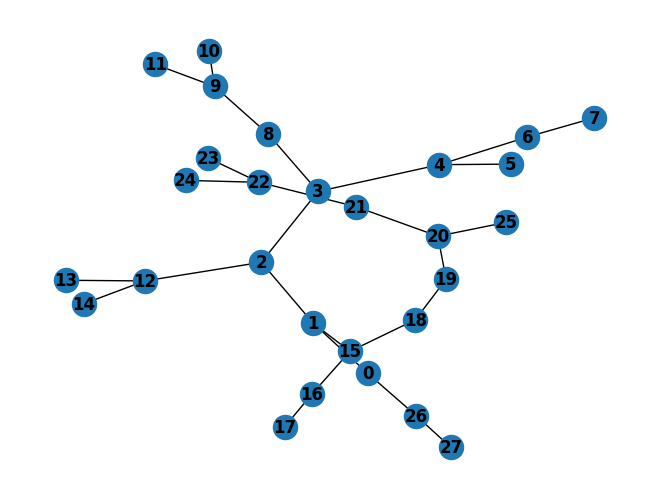

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_graph(hall_of_fame):
  nodes, edges, labels = gp.graph(hall_of_fame)
  g = nx.Graph()
  g.add_nodes_from(nodes)
  g.add_edges_from(edges)
  print("Количество ребер: ", len(edges))
  print("Количество вершин: ", len(nodes))

# рисуем граф и отображаем его
  nx.draw(g, with_labels=True, font_weight='bold')
  plt.show()

draw_graph(hall_of_fame[0])

## ЛР №5-6

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


   	      	                          fitness                          	                      size                     
   	      	-----------------------------------------------------------	-----------------------------------------------
gen	nevals	avg   	gen	max        	min   	nevals	std        	avg 	gen	max	min	nevals	std    
0  	500   	558787	0  	1.65421e+07	181329	500   	2.16076e+06	3.83	0  	7  	2  	500   	1.65321
1  	413   	279494	1  	1.63422e+07	181329	413   	1.08349e+06	4.348	1  	12 	1  	413   	2.03148
2  	399   	599273	2  	1.92935e+08	151665	399   	8.6158e+06 	4.69 	2  	15 	1  	399   	2.38367
3  	418   	342408	3  	1.63422e+07	172155	418   	1.47464e+06	4.708	3  	17 	1  	418   	2.56022
4  	401   	6.29345e+11	4  	3.14204e+14	172155	401   	1.40375e+13	4.838	4  	17 	1  	401   	2.8021 
5  	392   	316445     	5  	1.70709e+07	100268	392   	1.42816e+06	5.1  	5  	17 	1  	392   	2.99166
6  	404   	1.20452e+06	6  	4.41139e+08	167623	404   	1.97401e+07	5.444	6  	20 	1  	404   	3.09949
7  	3

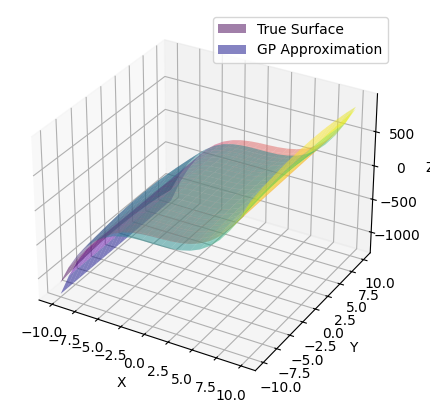

In [4]:
import operator
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import algorithms, base, creator, tools, gp

# Определение функции, которую будем аппроксимировать
def target_function(x, y, z):
    return x**3 - y**2 + np.sin(z)

# Определение безопасного оператора деления
def safe_div(numerator, denominator):
    return numerator / denominator if denominator != 0 else 1

# Определение функции оценки
def eval_func(individual, points):
    func = toolbox.compile(expr=individual)
    predictions = [func(*point) for point in points]
    mse = np.mean((predictions - np.array([target_function(*point) for point in points]))**2)
    return mse,

# Создание набора примитивов
pset = gp.PrimitiveSet("MAIN", 3)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(safe_div, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(np.square, 1)  # Добавление возведения в квадрат
pset.renameArguments(ARG0='x')
pset.renameArguments(ARG1='y')
pset.renameArguments(ARG2='z')

# Определение генетического программирования
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", eval_func, points=[(x, y, z) for x in range(-10, 11) for y in range(-10, 11) for z in range(-10, 11)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

# Генетическая программация
def main():
    random.seed(42)
    population = toolbox.population(n=500)  # Увеличение размера популяции
    hof = tools.HallOfFame(1)
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Настройка логбука для хранения статистики
    logbook = tools.Logbook()
    logbook.header = "gen", "nevals", "fitness", "size"
    logbook.chapters["fitness"].header = "avg", "gen", "max", "min", "nevals", "std"
    logbook.chapters["size"].header = "avg", "gen", "max", "min", "nevals", "std"

    # Запуск процесса эволюции
    population, log = algorithms.eaSimple(population, toolbox, 0.7, 0.3, 20, stats=mstats, halloffame=hof, verbose=True)  # Увеличение вероятностей кроссовера и мутации, а также количества поколений

    # Запись данных в логбук
    for gen, record in enumerate(log):
        record['gen'] = gen  # Add 'gen' key to the record dictionary
        record['nevals'] = len(population)  # Add 'nevals' key to the record dictionary
        logbook.record(**record)  # Pass the entire record dictionary to logbook.record()

    # Вывод логбука, только если он не пустой
    print("Logbook:")
    if len(logbook) > 0:
        for name, chapter in logbook.chapters.items():
            print(f"Chapter: {name}")
            if len(chapter) > 0:
                print(chapter)
            else:
                print("Chapter is empty")
    else:
        print("Logbook is empty, no data to display.")

    # Визуализация лучших найденных моделей
    best_individual = hof[0]
    print("Best individual is:", best_individual)
    print("Best fitness is:", best_individual.fitness.values[0])

    # Визуализация результатов
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    X = np.arange(-10, 11, 1)
    Y = np.arange(-10, 11, 1)
    X, Y = np.meshgrid(X, Y)
    Z_true = target_function(X, Y, X**2 + Y**2)  # Calculate true Z values
    func = toolbox.compile(expr=best_individual)  # Compile the best individual to a callable function
    Z_pred = np.array([[func(x, y, x**2 + y**2) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])  # Calculate predicted Z values

    # Plot the true surface
    ax.plot_surface(X, Y, Z_true, alpha=0.5, cmap='viridis', label='True Surface')

    # Plot the GP approximation
    ax.plot_surface(X, Y, Z_pred, alpha=0.5, cmap='plasma', label='GP Approximation')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


   	      	                          fitness                          	                      size                     
   	      	-----------------------------------------------------------	-----------------------------------------------
gen	nevals	avg   	gen	max        	min    	nevals	std        	avg 	gen	max	min	nevals	std    
0  	500   	543430	0  	1.58165e+07	95978.7	500   	2.06405e+06	3.83	0  	7  	2  	500   	1.65321
1  	403   	1.24267e+12	1  	2.55181e+14	7514.22	403   	1.68373e+13	3.964	1  	10 	1  	403   	1.88327
2  	395   	2.19669e+06	2  	8.23269e+08	159502 	395   	3.68236e+07	4.056	2  	15 	1  	395   	2.22371
3  	413   	2.31831e+12	3  	1.15911e+15	159502 	413   	5.17851e+13	4.372	3  	16 	1  	413   	2.63242
4  	410   	5.73593e+14	4  	2.86797e+17	107469 	410   	1.28131e+16	4.674	4  	15 	1  	410   	2.82484
5  	386   	-3.15057e+13	5  	1.7379e+15 	-1.77459e+16	386   	7.96877e+14	5.4  	5  	20 	1  	386   	3.39234
6  	407   	2.35689e+12 	6  	1.17845e+15	7514.22     	407   	5.2649e+13 	6.0

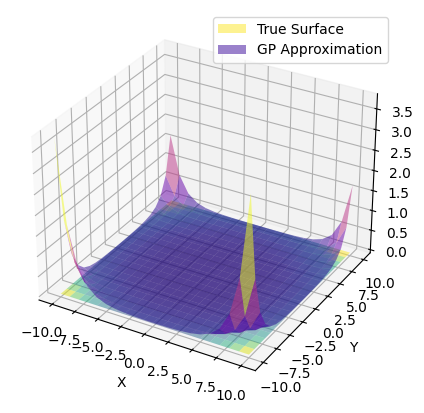

In [5]:
import operator
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from deap import algorithms, base, creator, tools, gp

# Определение функции, которую будем аппроксимировать
def target_function(x, y, z):
    return x**2 + y**3 + z**2


# Определение безопасного оператора деления
def safe_div(numerator, denominator):
    return numerator / denominator if denominator != 0 else 1

# Определение функции оценки
def eval_func(individual, points):
    func = toolbox.compile(expr=individual)
    predictions = [func(*point) for point in points]
    mse = np.mean((predictions - np.array([target_function(*point) for point in points]))**2)
    return mse,

# Создание набора примитивов
pset = gp.PrimitiveSet("MAIN", 3)
pset.addPrimitive(operator.add, 2)
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(safe_div, 2)
pset.addPrimitive(operator.neg, 1)
pset.addPrimitive(np.square, 1)  # Добавление возведения в квадрат
pset.renameArguments(ARG0='x')
pset.renameArguments(ARG1='y')
pset.renameArguments(ARG2='z')

# Определение генетического программирования
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)
toolbox.register("evaluate", eval_func, points=[(x, y, z) for x in range(-10, 11) for y in range(-10, 11) for z in range(-10, 11)])
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", gp.cxOnePoint)
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))

# Генетическая программация
def main():
    random.seed(42)
    population = toolbox.population(n=500)  # Увеличение размера популяции
    hof = tools.HallOfFame(1)
    stats_fit = tools.Statistics(lambda ind: ind.fitness.values)
    stats_size = tools.Statistics(len)
    mstats = tools.MultiStatistics(fitness=stats_fit, size=stats_size)
    mstats.register("avg", np.mean)
    mstats.register("std", np.std)
    mstats.register("min", np.min)
    mstats.register("max", np.max)

    # Настройка логбука для хранения статистики
    logbook = tools.Logbook()
    logbook.header = "gen", "nevals", "fitness", "size"
    logbook.chapters["fitness"].header = "avg", "gen", "max", "min", "nevals", "std"
    logbook.chapters["size"].header = "avg", "gen", "max", "min", "nevals", "std"

    # Запуск процесса эволюции
    population, log = algorithms.eaSimple(population, toolbox, 0.7, 0.3, 20, stats=mstats, halloffame=hof, verbose=True)  # Увеличение вероятностей кроссовера и мутации, а также количества поколений

    # Запись данных в логбук
    for gen, record in enumerate(log):
        record['gen'] = gen  # Add 'gen' key to the record dictionary
        record['nevals'] = len(population)  # Add 'nevals' key to the record dictionary
        logbook.record(**record)  # Pass the entire record dictionary to logbook.record()

    # Вывод логбука, только если он не пустой
    print("Logbook:")
    if len(logbook) > 0:
        for name, chapter in logbook.chapters.items():
            print(f"Chapter: {name}")
            if len(chapter) > 0:
                print(chapter)
            else:
                print("Chapter is empty")
    else:
        print("Logbook is empty, no data to display.")

    # Визуализация лучших найденных моделей
    best_individual = hof[0]
    print("Best individual is:", best_individual)
    print("Best fitness is:", best_individual.fitness.values[0])

    # Визуализация результатов
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection='3d')
    X = np.arange(-10, 11, 1)
    Y = np.arange(-10, 11, 1)
    X, Y = np.meshgrid(X, Y)
    Z_true = target_function(X, Y, X**2 + Y**2)  # Calculate true Z values
    func = toolbox.compile(expr=best_individual)  # Compile the best individual to a callable function
    Z_pred = np.array([[func(x, y, x**2 + y**2) for x, y in zip(row_x, row_y)] for row_x, row_y in zip(X, Y)])  # Calculate predicted Z values

    # Plot the true surface
    ax.plot_surface(X, Y, Z_true, alpha=0.5, cmap='viridis', label='True Surface')

    # Plot the GP approximation
    ax.plot_surface(X, Y, Z_pred, alpha=0.5, cmap='plasma', label='GP Approximation')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


## ЛР №7

7) Робот, который должен собрать решетки - запускаем код из отчета, который выложен в тимсе. Сейчас робот собирает 94 решетки, а должен 124 - надо покрутить параметры. Подсказка от Трофимова: есть ограничение на количество движений робота, даем ему доступ к большему количеству шагов - задача достигается.

In [7]:
import random
import copy
from functools import partial
from deap import base, creator, tools, algorithms, gp
import numpy as np

class RobotController(object):
    def __init__(self, max_moves):
        self.max_moves = max_moves
        self.moves = 0
        self.consumed = 0
        self.routine = None
        self.moves_done = []
        self.direction = ["north", "east", "south", "west"]
        self.direction_row = [1, 0, -1, 0]
        self.direction_col = [0, 1, 0, -1]

    def _reset(self):
        self.row = self.row_start
        self.col = self.col_start
        self.direction = 1
        self.moves = 0
        self.consumed = 0
        self.matrix_exc = copy.deepcopy(self.matrix)
        self.moves_done = []

    def _conditional(self, condition, out1, out2):
        out1() if condition() else out2()

    def turn_left(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction - 1) % 4
            self.moves_done.append("turn left")

    def turn_right(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.direction = (self.direction + 1) % 4
            self.moves_done.append("turn right")

    def move_forward(self):
        if self.moves < self.max_moves:
            self.moves += 1
            self.row = (self.row + self.direction_row[self.direction]) % self.matrix_row
            self.col = (self.col + self.direction_col[self.direction]) % self.matrix_col
            if self.matrix_exc[self.row][self.col] == "target":
                self.consumed += 1
            self.matrix_exc[self.row][self.col] = "passed"
            self.moves_done.append("move_forward")

    def sense_target(self):
        ahead_row = (self.row + self.direction_row[self.direction]) % self.matrix_row
        ahead_col = (self.col + self.direction_col[self.direction]) % self.matrix_col
        return self.matrix_exc[ahead_row][ahead_col] == "target"

    def if_target_ahead(self, out1, out2):
        return partial(self._conditional, self.sense_target, out1, out2)

    def run(self, routine):
        self._reset()
        while self.moves < self.max_moves:
            routine()

    def traverse_map(self, matrix):
        self.matrix = list()
        for i, line in enumerate(matrix):
            self.matrix.append(list())
            for j, col in enumerate(line):
                if col == "#":
                    self.matrix[-1].append("target")
                elif col == ".":
                    self.matrix[-1].append("empty")
                elif col == "S":
                    self.matrix[-1].append("empty")
                    self.row_start = self.row = i
                    self.col_start = self.col = j
                    self.direction = 1
        self.matrix_row = len(self.matrix)
        self.matrix_col = len(self.matrix[0])
        self.matrix_exc = copy.deepcopy(self.matrix)

class Prog(object):
    def _progn(self, *args):
        for arg in args:
            arg()

    def prog2(self, out1, out2):
        return partial(self._progn, out1, out2)

    def prog3(self, out1, out2, out3):
        return partial(self._progn, out1, out2, out3)

def eval_func(individual):
    global robot, pset
    routine = gp.compile(individual, pset)
    robot.run(routine)
    return robot.consumed,

def create_toolbox():
    global robot, pset
    pset = gp.PrimitiveSet("MAIN", 0)
    pset.addPrimitive(robot.if_target_ahead, 2)
    pset.addPrimitive(Prog().prog2, 2)
    pset.addPrimitive(Prog().prog3, 3)
    pset.addTerminal(robot.move_forward)
    pset.addTerminal(robot.turn_left)
    pset.addTerminal(robot.turn_right)

    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("expr_init", gp.genFull, pset=pset, min_=1, max_=2)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr_init)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", eval_func)
    toolbox.register("select", tools.selTournament, tournsize=7)
    toolbox.register("mate", gp.cxOnePoint)
    toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)
    toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)
    return toolbox

if __name__ == "__main__":
    global robot
    random.seed(7)
    max_moves = 2500
    robot = RobotController(max_moves)
    toolbox = create_toolbox()
    with open('target_map.txt', 'r') as f:
        robot.traverse_map(f)
    population = toolbox.population(n=400)
    hall_of_fame = tools.HallOfFame(1)
    stats = tools.Statistics(lambda x: x.fitness.values)
    stats.register("avg", np.mean)
    stats.register("std", np.std)
    stats.register("min", np.min)
    stats.register("max", np.max)
    probab_crossover = 0.6
    probab_mutate = 0.2
    num_generations = 120
    algorithms.eaSimple(population, toolbox, probab_crossover, probab_mutate, num_generations, stats, halloffame=hall_of_fame)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg  	std    	min	max
0  	400   	1.515	4.49275	0  	62 
1  	244   	4.2975	7.42017	0  	62 
2  	283   	9.1275	13.9759	0  	114
3  	269   	19.12 	22.8896	0  	114
4  	272   	33.1825	31.8961	0  	118
5  	260   	47.475 	39.2532	0  	118
6  	293   	50.57  	46.6365	0  	118
7  	268   	61.6725	49.8721	0  	118
8  	277   	65.9175	52.5997	0  	118
9  	274   	68.855 	51.6065	0  	118
10 	282   	68.0475	52.2854	0  	121
11 	277   	72.37  	52.8649	0  	118
12 	291   	70.6825	53.0405	0  	118
13 	275   	73.9025	52.4938	0  	118
14 	257   	76.48  	52.2337	0  	118
15 	264   	75.6675	52.2456	0  	118
16 	259   	77.855 	51.2798	0  	118
17 	277   	72.6925	52.7808	0  	118
18 	280   	77.1775	50.3637	0  	119
19 	271   	82.495 	50.401 	0  	119
20 	272   	84.35  	49.6274	0  	119
21 	273   	83.6925	49.3548	0  	119
22 	273   	82.63  	49.6401	0  	119
23 	267   	82.24  	50.3579	0  	120
24 	250   	78.44  	51.3016	0  	120
25 	263   	80.9225	50.4949	0  	120
26 	278   	74.04  	52.4552	0  	120
27 	279   	78.2425	51.5172	

## ЛР №8

8) Поиск минимальных маршрутов в графе (общий канал, 22.04) - это лр6 на ютубе, есть ссылка в тимсе. Лаба из двух частей, запускаем видео, скачиваем код из двух файлов, объединяем код и закидываем в коллаб. Основная часть задания - изменить количество вершин, вес путей указать самостоятельно; проанализировать, как изменится маршрут с обновленным числом вершин и весом путей.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	min	avg    
0  	1000  	437	1632.84
1  	158   	437	1304.36
2  	167   	420	1069.06
3  	150   	420	879.039
4  	146   	309	717.502
5  	168   	309	618.794
6  	173   	227	545.512
7  	156   	227	490.366
8  	147   	227	442.897
9  	147   	219	417.215
10 	156   	219	384.264
11 	139   	215	330.958
12 	169   	215	315.857
13 	164   	215	288.075
14 	167   	213	259.699
15 	128   	127	256.444
16 	140   	126	257.045
17 	171   	126	271.64 
18 	163   	121	273.384
19 	179   	121	259.233
20 	154   	121	223.197
[[0, 4, 1, 5, 3, 6, 2], [1, 2, 0, 3, 4, 6, 5], [2, 1, 0, 3, 6, 5, 4], [3, 0, 4, 1, 2, 6, 5], [2, 4, 3, 5, 6, 0, 1], [2, 5, 0, 6, 4, 3, 1], [6, 3, 5, 2, 4, 1, 0]]


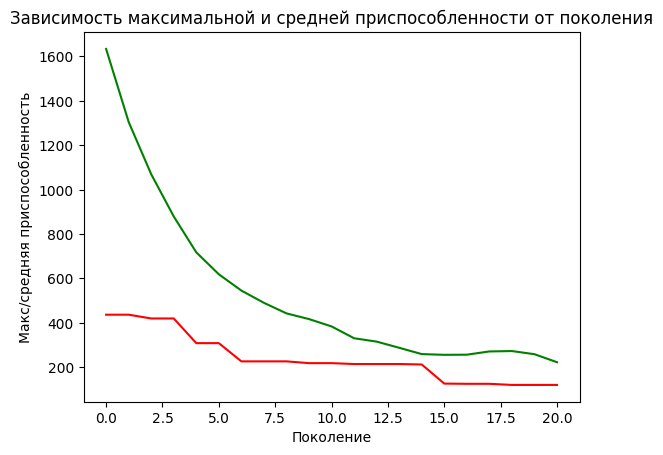

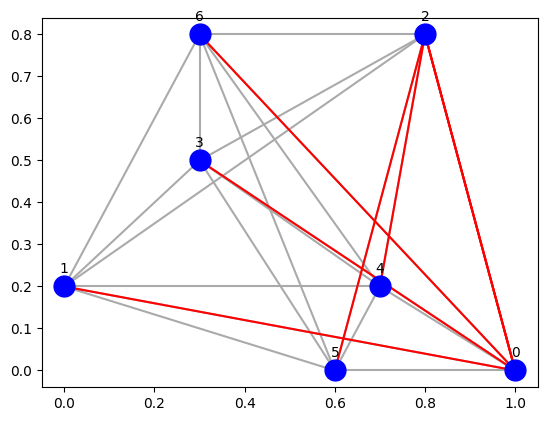

In [10]:
from matplotlib.lines import Line2D
import random
import matplotlib.pyplot as plt
import numpy as np
from deap import base, algorithms, creator, tools

# Увеличиваем количество вершин
vertex = ((1, 0), (0, 0.2), (0.8, 0.8), (0.3, 0.5), (0.7, 0.2), (0.6, 0), (0.3, 0.8))

vx = [v[0] for v in vertex]
vy = [v[1] for v in vertex]

# Функция для отображения графа
def show_graph(ax, best):
    # Добавляем ребра между вершинами
    for i in range(len(vertex)):
        for j in range(i + 1, len(vertex)):
            ax.add_line(Line2D((vertex[i][0], vertex[j][0]), (vertex[i][1], vertex[j][1]), color='#aaa'))

    # Добавляем ребра, соответствующие пути
    startV = 0
    for i, v in enumerate(best):
        if i == 0:
            continue

        prev = startV
        v = v[:v.index(i)+1]
        for j in v:
            ax.add_line(Line2D((vertex[prev][0], vertex[j][0]), (vertex[prev][1], vertex[j][1]), color='r'))
            prev = j

    ax.plot(vx, vy, ' ob', markersize=15)

    # Нумерация узлов
    for i, (x, y) in enumerate(vertex):
        ax.annotate(str(i), (x, y), textcoords="offset points", xytext=(0,10), ha='center')

inf = 100
# Обновляем матрицу смежности D
D = ((0, 3, 1, 3, inf, inf, inf),
     (3, 0, 4, inf, inf, inf, inf),
     (1, 4, 0, inf, 7, 5, inf),
     (3, inf, inf, 0, inf, 2, inf),
     (inf, inf, 7, inf, 0, 4, inf),
     (inf, inf, 5, 2, 4, 0, inf),
     (inf, inf, inf, inf, inf, inf, 0))

startV = 0              # стартовая вершина
LENGTH_D = len(D)
LENGTH_CHROM = len(D)*len(D[0])    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 1000   # количество индивидуумов в популяции
P_CROSSOVER = 0.8       # вероятность скрещивания
P_MUTATION = 0.3        # вероятность мутации индивидуума
MAX_GENERATIONS = 20    # максимальное количество поколений
HALL_OF_FAME_SIZE = 1

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("randomOrder", random.sample, range(LENGTH_D), LENGTH_D)
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.randomOrder, LENGTH_D)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)

def dikstryFitness(individual):
    s = 0
    for n, path in enumerate(individual):
        path = path[:path.index(n)+1]

        si = startV
        for j in path:
            s += D[si][j]
            si = j

    return s,         # кортеж

def cxOrdered(ind1, ind2):
    for p1, p2 in zip(ind1, ind2):
        tools.cxOrdered(p1, p2)

    return ind1, ind2

def mutShuffleIndexes(individual, indpb):
    for ind in individual:
        tools.mutShuffleIndexes(ind, indpb)

    return individual,

toolbox.register("evaluate", dikstryFitness)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", cxOrdered)
toolbox.register("mutate", mutShuffleIndexes, indpb=1.0/LENGTH_CHROM/10)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)

population, logbook = algorithms.eaSimple(population, toolbox,
                                        cxpb=P_CROSSOVER/LENGTH_D,
                                        mutpb=P_MUTATION/LENGTH_D,
                                        ngen=MAX_GENERATIONS,
                                        halloffame=hof,
                                        stats=stats,
                                        verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')

fig, ax = plt.subplots()
show_graph(ax, best)
plt.show()
